<a href="https://colab.research.google.com/github/snpushpi/Covid19_Contact_tracing_repo_beta/blob/master/Final_data_analysis_overlapped_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
plt.style.use('ggplot')
%matplotlib inline
import math

In [ ]:
main_intersection = [0,5,10,15,20,25,30,35,40,45,50,75,80,85]
l2 = len(main_intersection)

We will make a structure such that result dictionary has two main keys ('same' and 'different') mapping to two dictionaries. And then that same and different dictionaries will be mapping to three type of run numbers, 100, 10 and 1 and then in each run, we will have a dictionary mapping epsilon to tp,fp,fn,tn values.

In [ ]:
def f1(tp,fp,fn):
    return tp/(tp+0.5*(fp+fn))

In [ ]:
def MCC(tp, tn, fp, fn):
    num = tp*tn - fp*fn
    denom = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    return (num)/denom

In [ ]:
result_dict = {'same':{100:{},10:{},1:{}},'different':{100:{},10:{},1:{}}}

In [ ]:
tp_fp_list=[(8,342),(7,352),(5,355),(5,355),(8,317),(7,338),(5,328),(9,340),(8,343),(6,299),(8,347),(11,301)]
epsilon_list = [0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08]
result_dict1={}
l = len(epsilon_list)
for i in range(l):
    tp = tp_fp_list[i][0]
    fp = tp_fp_list[i][1]
    result_dict1[epsilon_list[i]]={'TP':tp,'FP':fp,'TN':720-14-fp,'FN':14-tp}
result_dict['same'][100]=result_dict1

In [ ]:
tp_fp_list = [(6,309),(9,297),(10,302),(9,297),(7,281),(6,277),(8,269),(8,251),(5,248),(11,267),(6,233),(7,245)]
epsilon_list = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
result_dict2={}
for i in range(l):
    tp = tp_fp_list[i][0]
    fp = tp_fp_list[i][1]
    result_dict2[epsilon_list[i]]={'TP':tp, 'FP':fp,'TN':720-14-fp, 'FN':14-tp}
result_dict['same'][10]=result_dict2

In [ ]:
tp_fp_list = [(6,213),(10,192),(6,173),(5,178),(4,137),(5,141),(4,103),(2,107),(6,69),(4,65),(1,63),(3,56)]
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
result_dict3 = {}
for i in range(l):
    tp = tp_fp_list[i][0]
    fp = tp_fp_list[i][1]
    result_dict3[epsilon_list[i]]={'TP':tp,'FP':fp,'TN':720-14-fp,'FN':14-tp}
result_dict['same'][1]=result_dict3

In [ ]:
tp_fp_list = [(10,22),(4,17),(8,17),(6,16),(7,18),(8,17),(9,22),(3,23),(9,19),(7,14),(6,24),(4,26)]
epsilon_list = [0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08]
result_dict4 = {}
for i in range(l):
    tp = tp_fp_list[i][0]
    fp = tp_fp_list[i][1]
    result_dict4[epsilon_list[i]]={'TP':tp,'FP':fp,'TN':720-14-fp,'FN':14-tp}
result_dict['different'][100]=result_dict4

In [ ]:
tp_fp_list = [(7,24),(7,15),(9,12),(7,18),(8,10),(8,20),(6,13),(5,20),(11,14),(6,10),(6,18),(8,16)]
epsilon_list = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
result_dict5 = {}
for i in range(l):
    tp = tp_fp_list[i][0]
    fp = tp_fp_list[i][1]
    result_dict5[epsilon_list[i]]={'TP':tp,'FP':fp,'TN':720-14-fp,'FN':14-tp}
result_dict['different'][10]=result_dict5

In [ ]:
tp_fp_list = [(4,12),(6,17),(4,12),(5,8),(4,6),(4,6),(4,10),( 3,3),(4,3),(3,5),(3,2),(2,5)]
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
result_dict6 = {}
for i in range(l):
    tp = tp_fp_list[i][0]
    fp = tp_fp_list[i][1]
    result_dict6[epsilon_list[i]]={'TP':tp,'FP':fp,'TN':720-14-fp,'FN':14-tp}
result_dict['different'][1]=result_dict6

In [ ]:
result_dict

We will do same vs different f1 score and MCC graph fixing run number each time.

In [ ]:
f_1score = {'same':{100:{},10:{},1:{}},'different':{100:{},10:{},1:{}}}
for elt1 in result_dict:
    for elt2 in result_dict[elt1]:
        temp_dict = {}
        for elt in result_dict[elt1][elt2]:
            tp = result_dict[elt1][elt2][elt]['TP']
            fp = result_dict[elt1][elt2][elt]['FP']
            fn = result_dict[elt1][elt2][elt]['FN']
            temp_dict[elt]=f1(tp, fp, fn)
        f_1score[elt1][elt2]=temp_dict




In [ ]:
f_1score

In [ ]:
MCC_score = {'same':{100:{},10:{},1:{}},'different':{100:{},10:{},1:{}}}
for elt1 in result_dict:
    for elt2 in result_dict[elt1]:
        temp_dict = {}
        for elt in result_dict[elt1][elt2]:
            tp = result_dict[elt1][elt2][elt]['TP']
            fp = result_dict[elt1][elt2][elt]['FP']
            fn = result_dict[elt1][elt2][elt]['FN']
            tn = result_dict[elt1][elt2][elt]['TN']
            temp_dict[elt]= MCC(tp, tn, fp, fn)
        MCC_score[elt1][elt2]= temp_dict

In [ ]:
MCC_score

Comparison between run numbers when the hash functions are the same

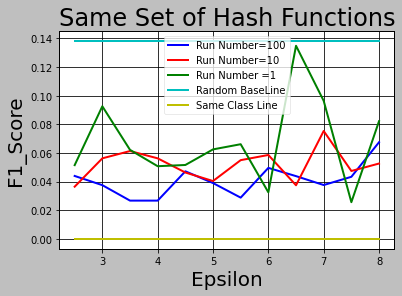

In [ ]:
list100 = []
list10 = []
list1 = []
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
for elt in epsilon_list:
    list100.append(f_1score['same'][100][elt/100])
    list10.append(f_1score['same'][10][elt/10])
    list1.append(f_1score['same'][1][elt])
f1_list = [0.138]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('F1_Score')
plt.plot(epsilon_list, list100,'b', label = 'Run Number=100')
plt.plot(epsilon_list,list10,'r',label='Run Number=10')
plt.plot(epsilon_list,list1,'g',label='Run Number =1')
plt.plot(epsilon_list,f1_list,'c',label='Random BaseLine')
plt.plot(epsilon_list,s_list,'y',label='Same Class Line')
plt.title('Same Set of Hash Functions')
#plt.scatter(epsilon_list, FNR_list1,c='r')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

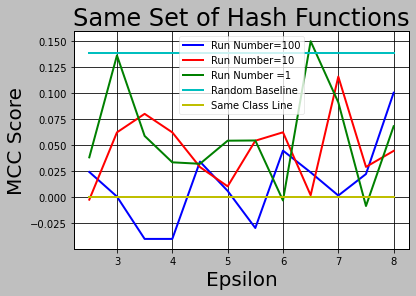

In [ ]:
list100 = []
list10 = []
list1 = []
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
for elt in epsilon_list:
    list100.append(MCC_score['same'][100][elt/100])
    list10.append(MCC_score['same'][10][elt/10])
    list1.append(MCC_score['same'][1][elt])
mcc_list = [0.138]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('MCC Score')
plt.plot(epsilon_list, list100,'b', label = 'Run Number=100')
plt.plot(epsilon_list,list10,'r',label='Run Number=10')
plt.plot(epsilon_list,list1,'g',label='Run Number =1')
plt.plot(epsilon_list,mcc_list,'c',label='Random Baseline')
plt.plot(epsilon_list,s_list,'y',label='Same Class Line')
plt.title('Same Set of Hash Functions')
#plt.scatter(epsilon_list, FNR_list1,c='r')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

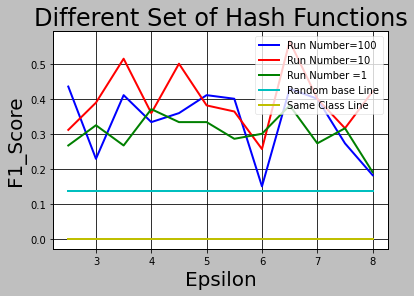

In [ ]:
list100 = []
list10 = []
list1 = []
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
for elt in epsilon_list:
    list100.append(f_1score['different'][100][elt/100])
    list10.append(f_1score['different'][10][elt/10])
    list1.append(f_1score['different'][1][elt])
f1_list = [0.138]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('F1_Score')
plt.plot(epsilon_list, list100,'b', label = 'Run Number=100')
plt.plot(epsilon_list,list10,'r',label='Run Number=10')
plt.plot(epsilon_list,list1,'g',label='Run Number =1 ')
plt.plot(epsilon_list,f1_list,'c', label='Random base Line')
plt.plot(epsilon_list,s_list,'y', label='Same Class Line')
plt.title('Different Set of Hash Functions')
#plt.scatter(epsilon_list, FNR_list1,c='r')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

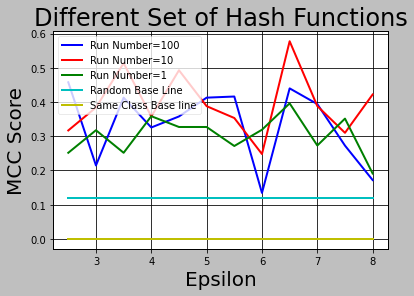

In [ ]:
list100 = []
list10 = []
list1 = []
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
for elt in epsilon_list:
    list100.append(MCC_score['different'][100][elt/100])
    list10.append(MCC_score['different'][10][elt/10])
    list1.append(MCC_score['different'][1][elt])
mcc_list = [.1203]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('MCC Score')
plt.plot(epsilon_list, list100,'b', label = 'Run Number=100')
plt.plot(epsilon_list,list10,'r',label='Run Number=10')
plt.plot(epsilon_list,list1,'g',label='Run Number=1')
plt.plot(epsilon_list,mcc_list,'c',label='Random Base Line')
plt.plot(epsilon_list,s_list,'y',label='Same Class Base line')
plt.title('Different Set of Hash Functions')
#plt.scatter(epsilon_list, FNR_list1,c='r')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

Now comparison between same set and different set of hash functions for a fixed run number 

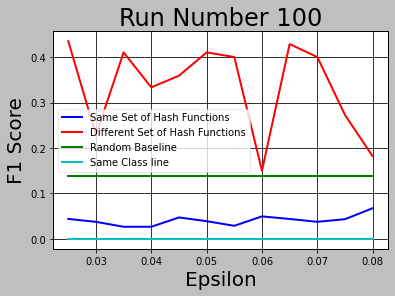

In [ ]:
diff_list = []
same_list = []
epsilon_list = [0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08]
for eps in epsilon_list:
    diff_list.append(f_1score['different'][100][eps])
    same_list.append(f_1score['same'][100][eps])
f1_list = [0.138]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('F1 Score')
plt.plot(epsilon_list,same_list,'b', label = 'Same Set of Hash Functions')
plt.plot(epsilon_list,diff_list,'r',label='Different Set of Hash Functions')
plt.plot(epsilon_list,f1_list,'g',label='Random Baseline')
plt.plot(epsilon_list,s_list,'c',label='Same Class line')
plt.title('Run Number 100')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

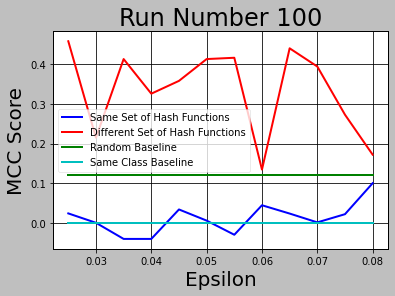

In [ ]:
diff_list = []
same_list = []
epsilon_list = [0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08]
for eps in epsilon_list:
    diff_list.append(MCC_score['different'][100][eps])
    same_list.append(MCC_score['same'][100][eps])
mcc_list = [.1203]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('MCC Score')
plt.plot(epsilon_list,same_list,'b', label = 'Same Set of Hash Functions')
plt.plot(epsilon_list,diff_list,'r',label='Different Set of Hash Functions')
plt.plot(epsilon_list, mcc_list, 'g', label = 'Random Baseline')
plt.plot(epsilon_list, s_list, 'c', label = 'Same Class Baseline')
plt.title('Run Number 100')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

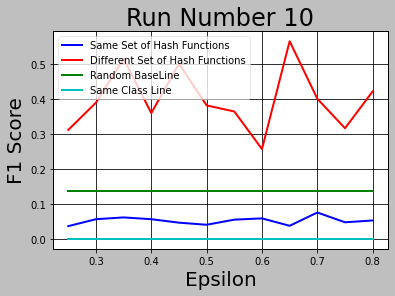

In [ ]:
diff_list = []
same_list = []
epsilon_list = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
for eps in epsilon_list:
    diff_list.append(f_1score['different'][10][eps])
    same_list.append(f_1score['same'][10][eps])
rand_list = [0.138]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('F1 Score')
plt.plot(epsilon_list,same_list,'b', label = 'Same Set of Hash Functions')
plt.plot(epsilon_list,diff_list,'r',label='Different Set of Hash Functions')
plt.plot(epsilon_list,rand_list,'g',label='Random BaseLine')
plt.plot(epsilon_list,s_list,'c',label='Same Class Line')
plt.title('Run Number 10')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

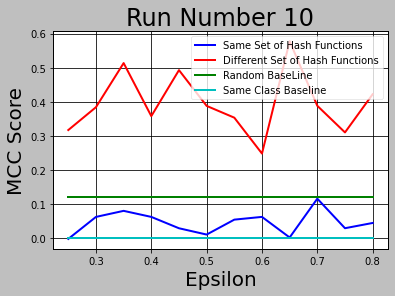

In [ ]:
diff_list = []
same_list = []
epsilon_list =  [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
for eps in epsilon_list:
    diff_list.append(MCC_score['different'][10][eps])
    same_list.append(MCC_score['same'][10][eps])
mcc_list = [0.1203]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('MCC Score')
plt.plot(epsilon_list,same_list,'b', label = 'Same Set of Hash Functions')
plt.plot(epsilon_list,diff_list,'r',label='Different Set of Hash Functions')
plt.plot(epsilon_list,mcc_list,'g', label = 'Random BaseLine')
plt.plot(epsilon_list,s_list,'c',label='Same Class Baseline')
plt.title('Run Number 10')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

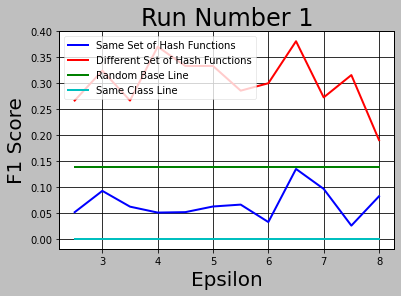

In [ ]:
diff_list = []
same_list = []
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
for eps in epsilon_list:
    diff_list.append(f_1score['different'][1][eps])
    same_list.append(f_1score['same'][1][eps])
rand_list = [0.138]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('F1 Score')
plt.plot(epsilon_list,same_list,'b', label = 'Same Set of Hash Functions')
plt.plot(epsilon_list,diff_list,'r',label='Different Set of Hash Functions')
plt.plot(epsilon_list,rand_list,'g', label='Random Base Line')
plt.plot(epsilon_list,s_list,'c', label='Same Class Line')
plt.title('Run Number 1')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

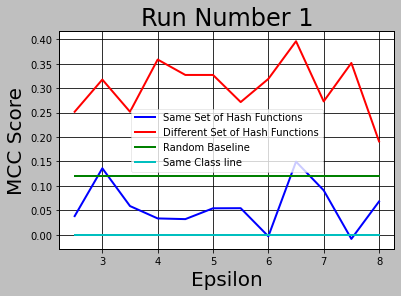

In [ ]:
diff_list = []
same_list = []
epsilon_list = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
for eps in epsilon_list:
    diff_list.append(MCC_score['different'][1][eps])
    same_list.append(MCC_score['same'][1][eps])
mcc_list = [0.1203]*12
s_list = [0]*12
fig = plt.figure()
plt.clf()
plt.xlabel('Epsilon')
plt.ylabel('MCC Score')
plt.plot(epsilon_list,same_list,'b', label = 'Same Set of Hash Functions')
plt.plot(epsilon_list,diff_list,'r',label='Different Set of Hash Functions')
plt.plot(epsilon_list, mcc_list, 'g', label = 'Random Baseline')
plt.plot(epsilon_list, s_list, 'c', label= 'Same Class line')
plt.title('Run Number 1')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.showbox'] = True
mpl.rcParams['axes.titlesize']=24
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['xtick.labelsize']=10
mpl.rcParams['ytick.labelsize']=10
#mpl.rcParams.keys()
plt.style.use(['grayscale'])
plt.legend()

In [ ]:
import numpy as np
b = np.random.choice([1,0],720,p=[0.02,0.98])

In [ ]:
b

In [ ]:
c = b.tolist()

In [ ]:
true=0
count1=0
check_set = {0,1,2,3,4,5,6,7,8,9,10,15,16,17}
for i in range(len(c)):
    if c[i]==1:
        count1+=1
        if i in check_set:
            true+=1
print(true,count1)

2 15


In [ ]:
tp = 2
fp = 13 
tn = 693
fn = 12

In [ ]:
f1_score = f1(tp, fp, fn)
mcc_score = MCC(tp, tn, fp, fn)

In [ ]:
f1_score

0.13793103448275862

In [ ]:
mcc_score

0.12030912135421519